# Thresholded zerocrossings for every ramps

In [1]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter
import time
#from nptdms import TdmsFile #Process raw ramping file


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 0. Helper functions

In [2]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#########-------Zero crossings---------###########

def zero_crossings(array):
    
    #Set values outside of range (0.001, 0.1) = 0
    array[abs(array) > 0.1] = 0
    array[abs(array) < 0.005] = 0
    
    #Calculate number of zero-crossing points, normalized by the window size
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of normalized zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s normalized Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
        
def plot_zero_crossings_product(dir_path, time_range = None, window = 25000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")
    
    %reset -f in
    
def load_and_plot(dir_path, channel, time_range):
    
    signal = load_sensor(dir_path, channel, time_range)
    time_axis = load_time(dir_path, time_range)
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, signal)
    
    plt.xlabel("Time (s)")
    plt.grid(True)
    
    %reset -f in

## Thresholded zero crossings for every ramps

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


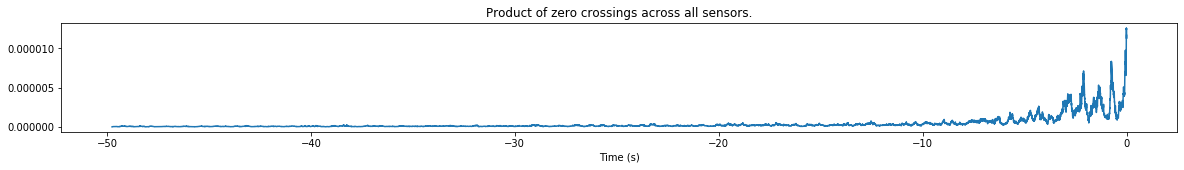

In [3]:
plot_zero_crossings_product("./data/Ramp4/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


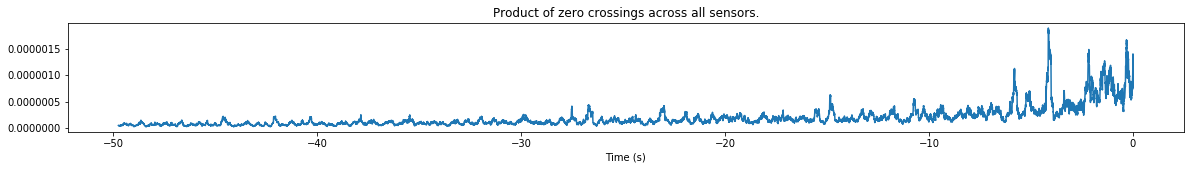

In [4]:
plot_zero_crossings_product("./data/Ramp5/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


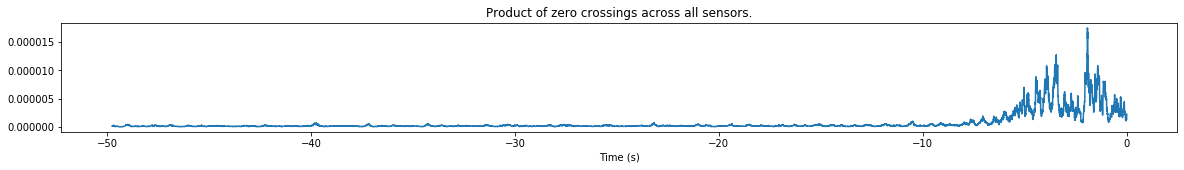

In [5]:
plot_zero_crossings_product("./data/Ramp12d/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


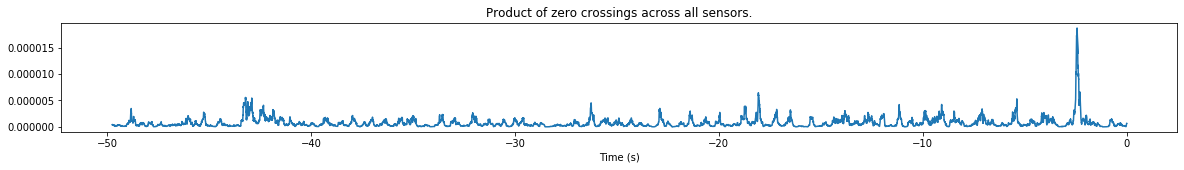

In [6]:
plot_zero_crossings_product("./data/Ramp19/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


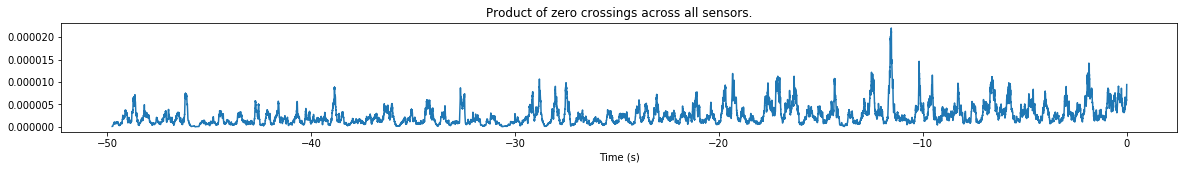

In [7]:
plot_zero_crossings_product("./data/Ramp20/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


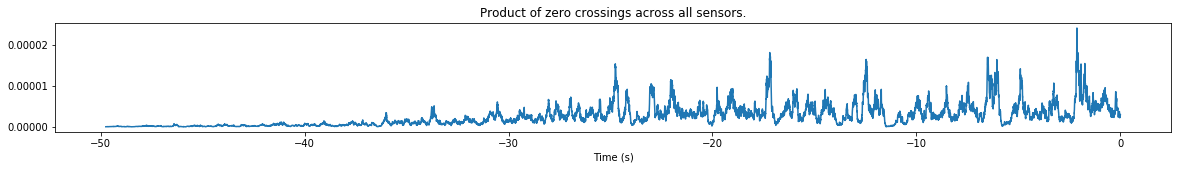

In [8]:
plot_zero_crossings_product("./data/Ramp21/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


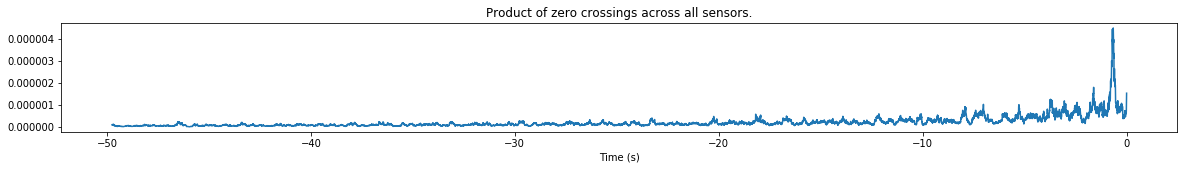

In [9]:
plot_zero_crossings_product("./data/Ramp22/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


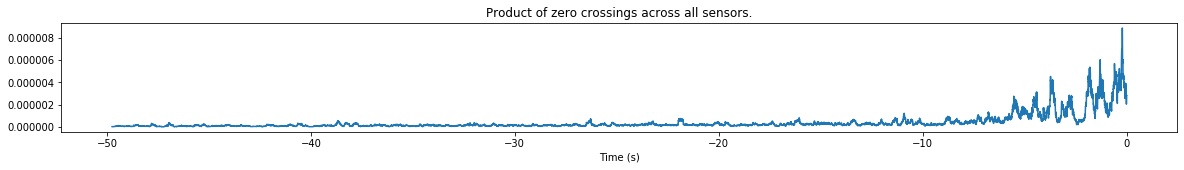

In [10]:
plot_zero_crossings_product("./data/Ramp23/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


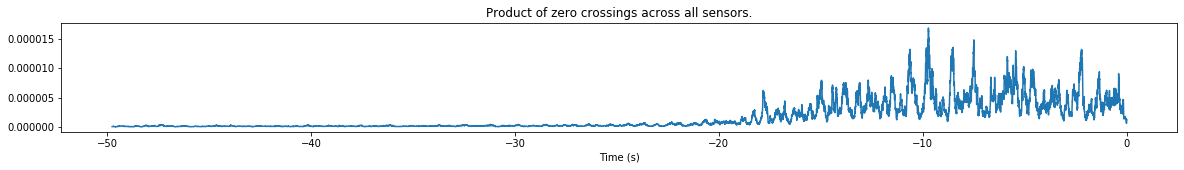

In [11]:
plot_zero_crossings_product("./data/Ramp24/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


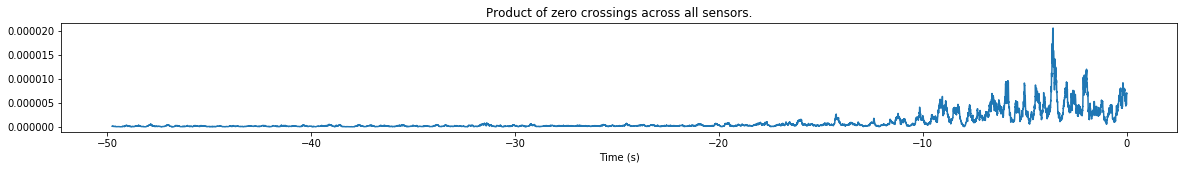

In [12]:
plot_zero_crossings_product("./data/Ramp25/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


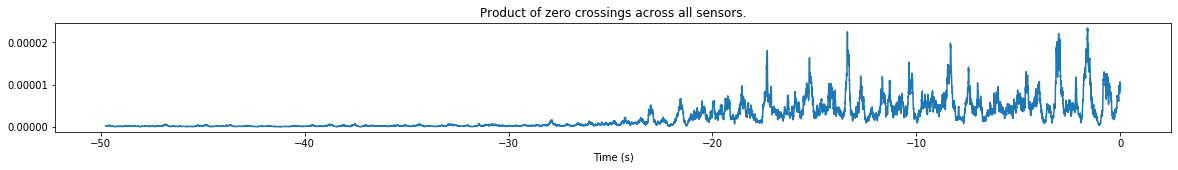

In [13]:
plot_zero_crossings_product("./data/Ramp26/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


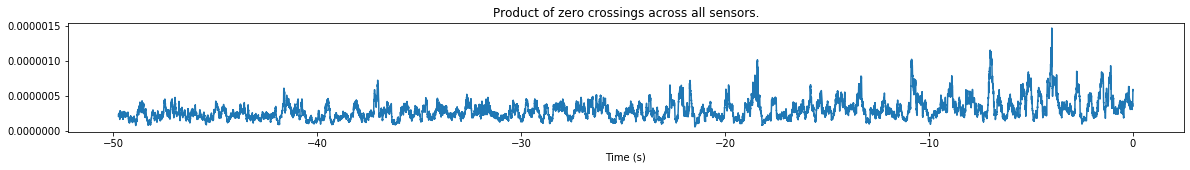

In [15]:
plot_zero_crossings_product("./data/Ramp27/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


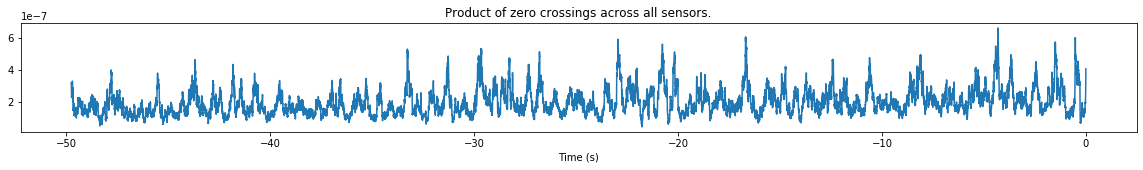

In [16]:
plot_zero_crossings_product("./data/Ramp28/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


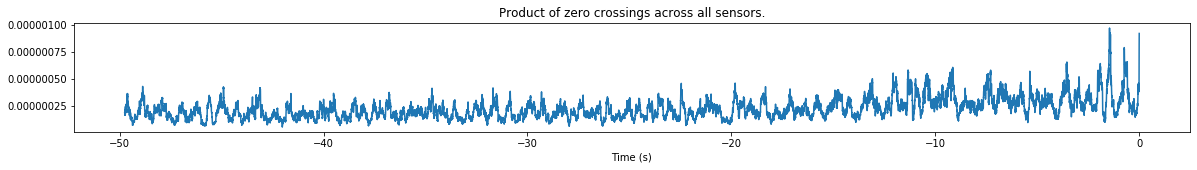

In [17]:
plot_zero_crossings_product("./data/Ramp29/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


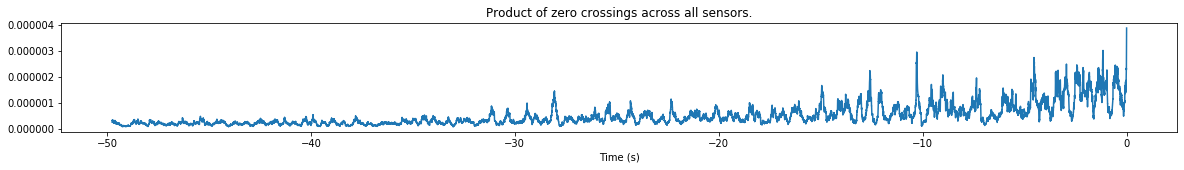

In [18]:
plot_zero_crossings_product("./data/Ramp30/", time_range = (-50,0), window = 25000)

## Different thresholds

## (0.01, 0.1)

In [2]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#########-------Zero crossings---------###########

def zero_crossings(array):
    
    #Set values outside of range (0.001, 0.1) = 0
    array[abs(array) > 0.1] = 0
    array[abs(array) < 0.01] = 0
    
    #Calculate number of zero-crossing points, normalized by the window size
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of normalized zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s normalized Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
        
def plot_zero_crossings_product(dir_path, time_range = None, window = 25000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")
    
    %reset -f in
    
def load_and_plot(dir_path, channel, time_range):
    
    signal = load_sensor(dir_path, channel, time_range)
    time_axis = load_time(dir_path, time_range)
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, signal)
    
    plt.xlabel("Time (s)")
    plt.grid(True)
    
    %reset -f in

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


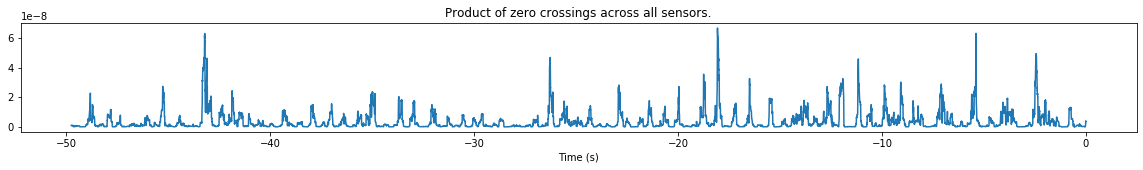

In [4]:
plot_zero_crossings_product("./data/Ramp19/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


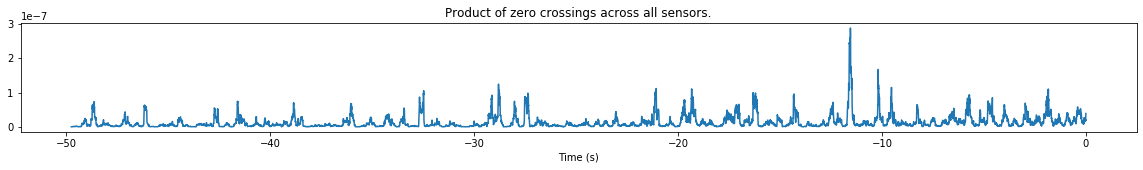

In [5]:
plot_zero_crossings_product("./data/Ramp20/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


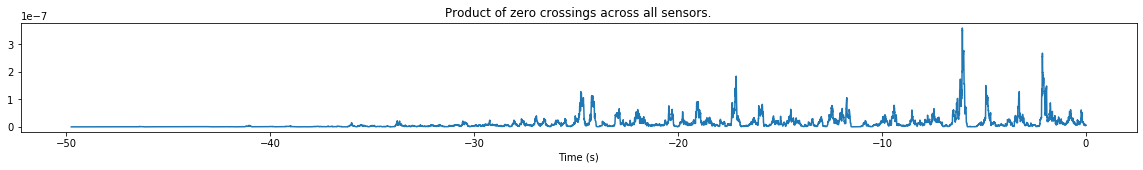

In [6]:
plot_zero_crossings_product("./data/Ramp21/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


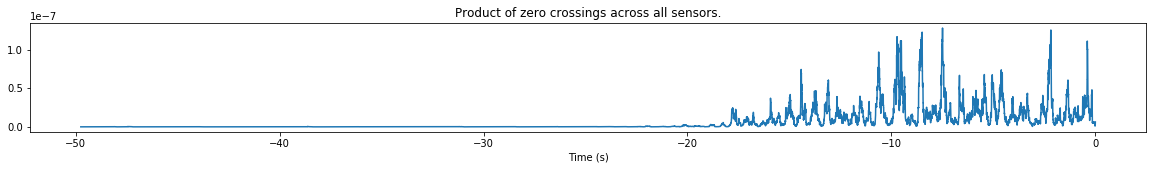

In [7]:
plot_zero_crossings_product("./data/Ramp24/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


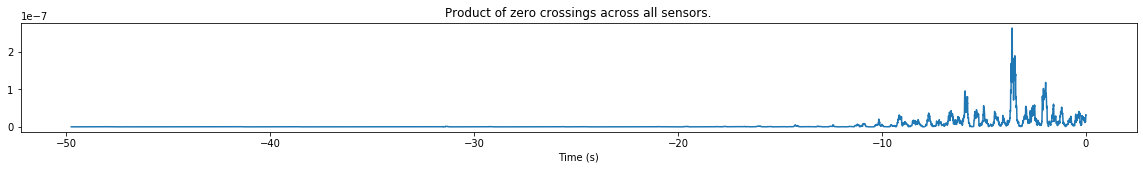

In [8]:
plot_zero_crossings_product("./data/Ramp25/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


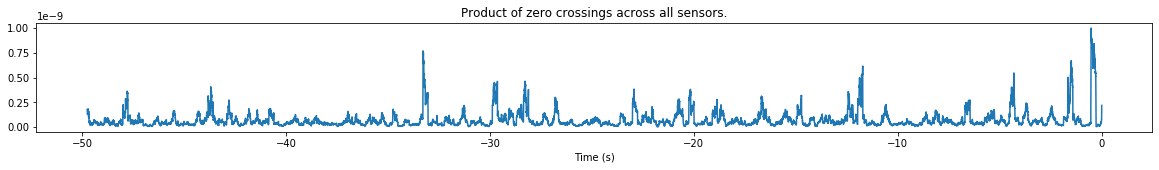

In [9]:
plot_zero_crossings_product("./data/Ramp28/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


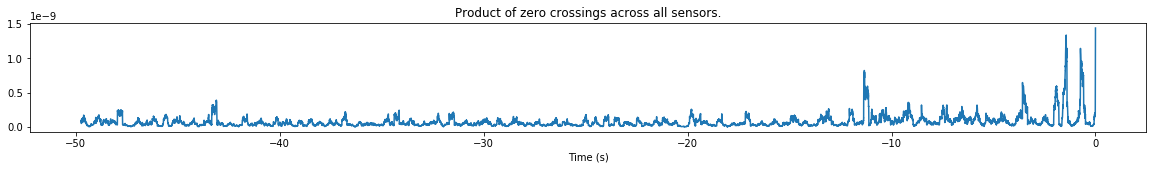

In [3]:
plot_zero_crossings_product("./data/Ramp29/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


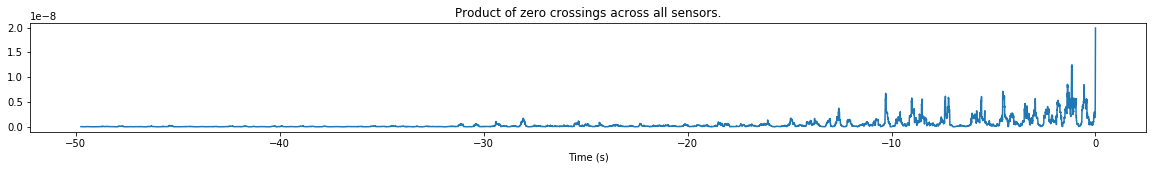

In [4]:
plot_zero_crossings_product("./data/Ramp30/", time_range = (-50,0), window = 25000)

## (0.012, 0.1)

In [2]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#########-------Zero crossings---------###########

def zero_crossings(array):
    
    #Set values outside of range (0.001, 0.1) = 0
    array[abs(array) > 0.1] = 0
    array[abs(array) < 0.012] = 0
    
    #Calculate number of zero-crossing points, normalized by the window size
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of normalized zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s normalized Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
        
def plot_zero_crossings_product(dir_path, time_range = None, window = 25000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")
    
    %reset -f in
    
def load_and_plot(dir_path, channel, time_range):
    
    signal = load_sensor(dir_path, channel, time_range)
    time_axis = load_time(dir_path, time_range)
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, signal)
    
    plt.xlabel("Time (s)")
    plt.grid(True)
    
    %reset -f in

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


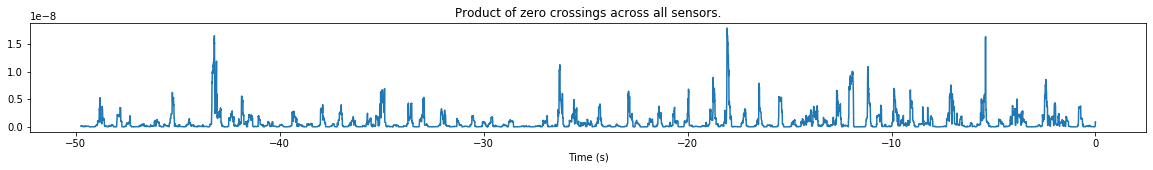

In [3]:
plot_zero_crossings_product("./data/Ramp19/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


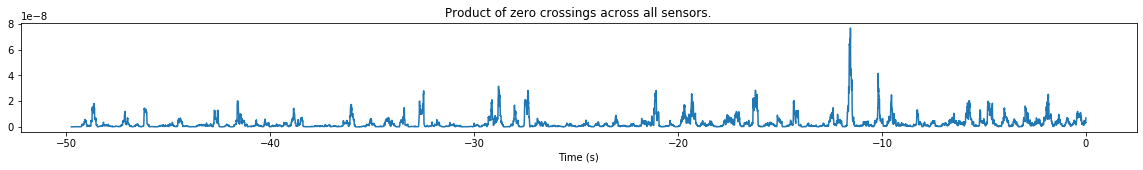

In [4]:
plot_zero_crossings_product("./data/Ramp20/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


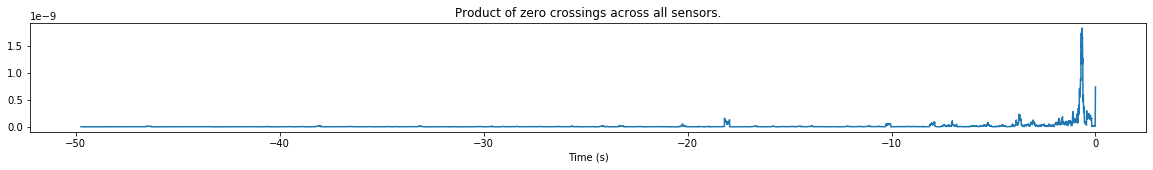

In [5]:
plot_zero_crossings_product("./data/Ramp22/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


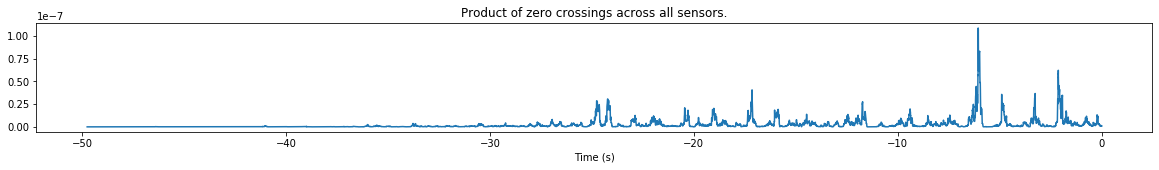

In [6]:
plot_zero_crossings_product("./data/Ramp21/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


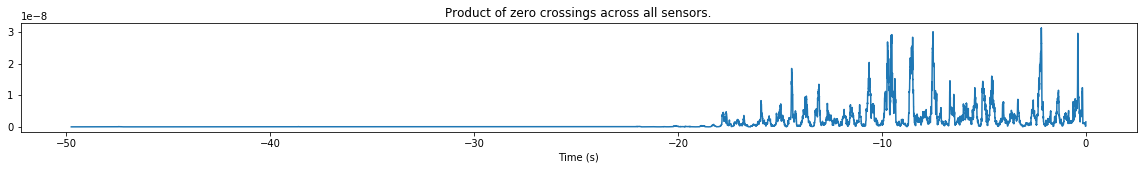

In [7]:
plot_zero_crossings_product("./data/Ramp24/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


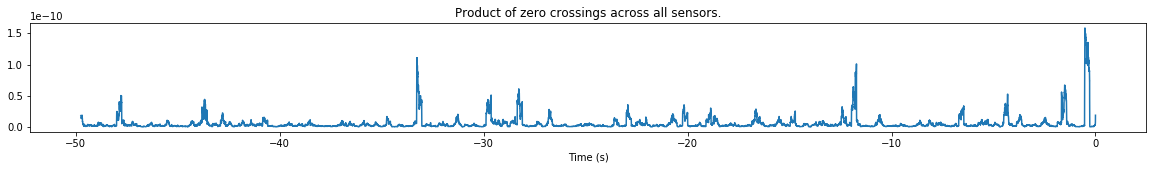

In [8]:
plot_zero_crossings_product("./data/Ramp28/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


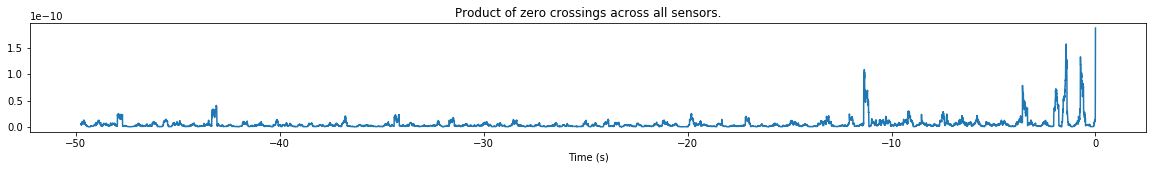

In [9]:
plot_zero_crossings_product("./data/Ramp29/", time_range = (-50,0), window = 25000)

## (0.015, 0.1)

In [3]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

#########-------Zero crossings---------###########

def zero_crossings(array):
    
    #Set values outside of range (0.001, 0.1) = 0
    array[abs(array) > 0.1] = 0
    array[abs(array) < 0.015] = 0
    
    #Calculate number of zero-crossing points, normalized by the window size
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()/array.size
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of normalized zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s normalized Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
        
def plot_zero_crossings_product(dir_path, time_range = None, window = 25000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")
    
    %reset -f in
    
def load_and_plot(dir_path, channel, time_range):
    
    signal = load_sensor(dir_path, channel, time_range)
    time_axis = load_time(dir_path, time_range)
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, signal)
    
    plt.xlabel("Time (s)")
    plt.grid(True)
    
    %reset -f in
    
def save_cross(dir_path, time_range = None, window = 25000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    %reset -f in
    
    np.save(dir_path + "cross-product", product)

-----------

In [4]:
save_cross("./data/Ramp25/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [5]:
save_cross("./data/Ramp26/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [6]:
save_cross("./data/Ramp27/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [7]:
save_cross("./data/Ramp30/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [4]:
save_cross("./data/Ramp12d/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [5]:
save_cross("./data/Ramp23/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [6]:
save_cross("./data/Ramp24/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [4]:
save_cross("./data/Ramp4/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [5]:
save_cross("./data/Ramp5/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [4]:
save_cross("./data/Ramp19/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [5]:
save_cross("./data/Ramp20/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [4]:
save_cross("./data/Ramp21/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [5]:
save_cross("./data/Ramp22/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [3]:
save_cross("./data/Ramp28/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


In [4]:
save_cross("./data/Ramp29/", time_range = (-200,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


-------------

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


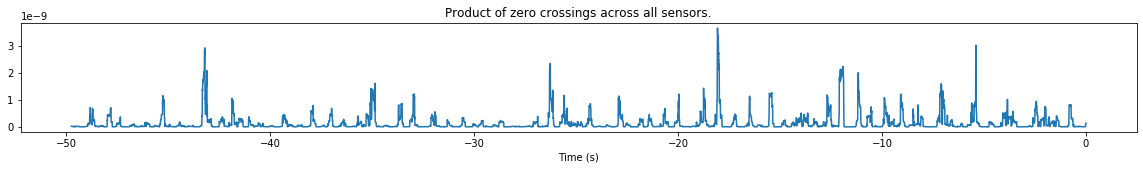

In [11]:
plot_zero_crossings_product("./data/Ramp19/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


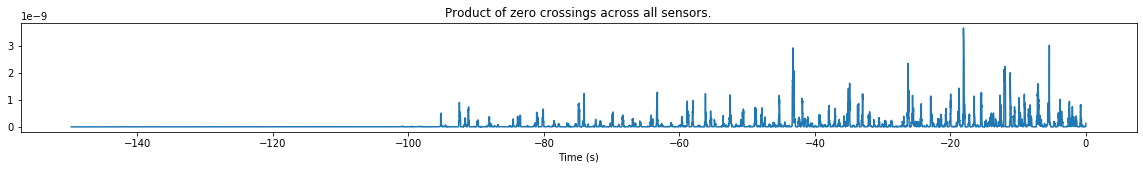

In [4]:
plot_zero_crossings_product("./data/Ramp19/", time_range = (-150,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


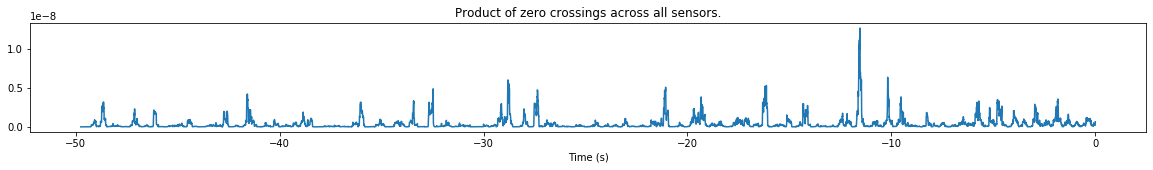

In [12]:
plot_zero_crossings_product("./data/Ramp20/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


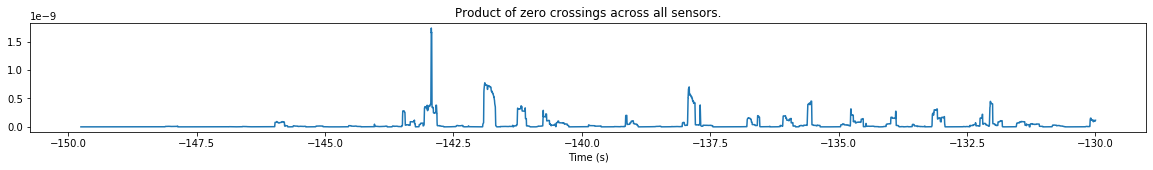

In [4]:
#Ramp 20 in a noisy range
plot_zero_crossings_product("./data/Ramp20/", time_range = (-150,-130), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


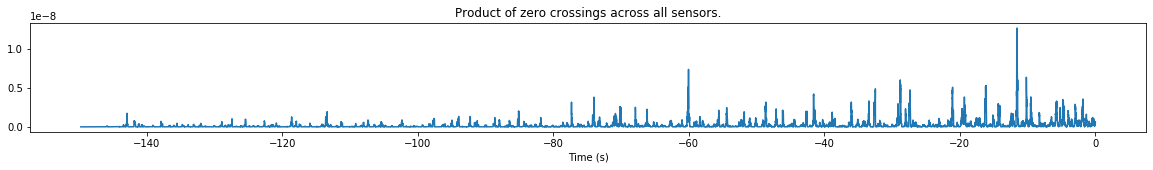

In [4]:
#Ramp 20 in a large range
plot_zero_crossings_product("./data/Ramp20/", time_range = (-150,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


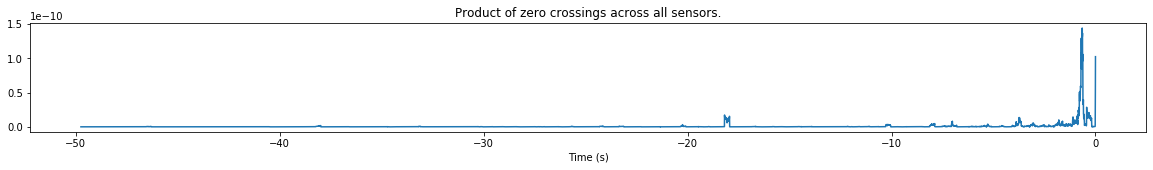

In [13]:
plot_zero_crossings_product("./data/Ramp22/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


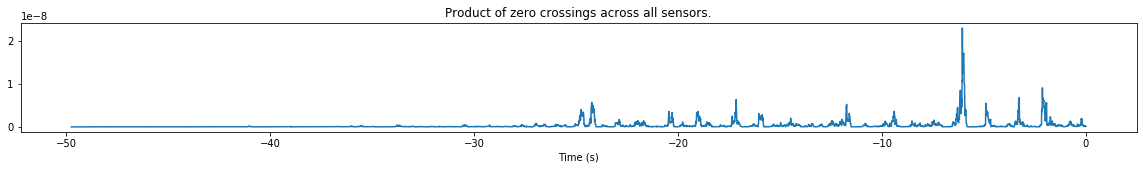

In [14]:
plot_zero_crossings_product("./data/Ramp21/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


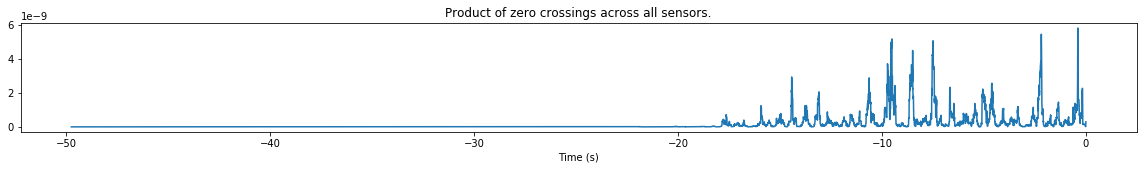

In [15]:
plot_zero_crossings_product("./data/Ramp24/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


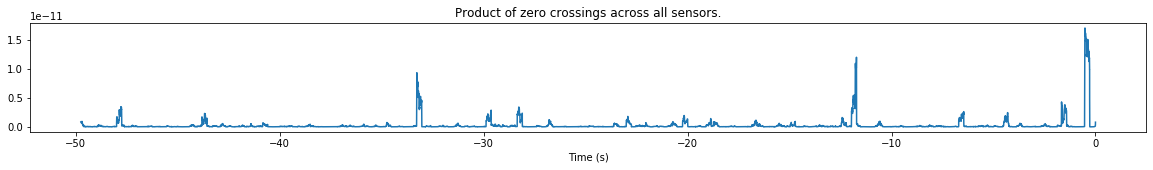

In [16]:
plot_zero_crossings_product("./data/Ramp28/", time_range = (-50,0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


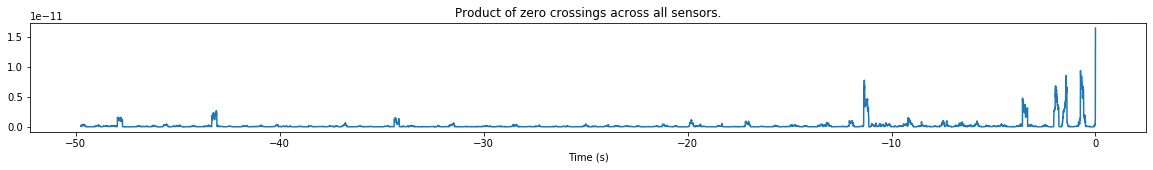

In [17]:
plot_zero_crossings_product("./data/Ramp29/", time_range = (-50,0), window = 25000)

---------------

In [ ]:
#Save data